In [67]:
import os

import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

In [79]:
SAMPLES = 10000
XMIN = 1
ALPHA = 2

In [195]:
def generatePowerLawSamples(samples, xmin, alpha):
    return xmin * (1 - np.random.uniform(size=samples))**(1 / (1 - alpha))

In [208]:
def sampleAndCompare(fitLS=False, fitMLE=False):
    '''
    returns [(empiricalX, empiricalY), (trueX, trueY)] and optionally
    [(alpha_ls1, fitY), (alpha_ls2, fit2) (alpha_mle, fit3)]
    '''
    sampled = np.around(generatePowerLawSamples(SAMPLES, XMIN, ALPHA))
    counts = Counter(sampled)
    XY = sorted(zip(counts.keys(), counts.values()))
    X,Y = zip(*XY)
    logX, logY = np.log10(X), np.log10(Y)
    
    trueX = np.arange(1, max(X))
    trueY = np.maximum(SAMPLES * (ALPHA - 1) / XMIN * (trueX / XMIN)**(-ALPHA), 1)
    ret = [(X,Y), (trueX, trueY)]
    if not fitLS and not fitMLE:
        return ret
    
    fit = []
    if fitLS:
        # Find LS alpha1.
        res = np.polyfit(logX, logY, 1)
        a1, b1 = res[0], res[1]
        pAlpha1Y = np.maximum(10**(a1 * np.log10(trueX) + b1), 1)

        # Filter out 1 counts (0 counts in logspace)
        iLogX, iLogY = zip(*[(logx, logy)
                             for logx, logy in zip(logX, logY)
                             if logy != 0])
        res2 = np.polyfit(iLogX, iLogY, 1)
        a2, b2 = res2[0], res2[1]
        pAlpha2Y = np.maximum(10**(a2 * np.log10(trueX) + b2), 1)
        fit += [(-a1, pAlpha1Y), (-a2, pAlpha2Y)]
    if fitMLE:
        assert XMIN == 1
        alphaMLE = 1 / np.mean(np.log(sampled)) + 1
        pAlphaMLEY = np.maximum(SAMPLES * (alphaMLE - 1) / XMIN * (trueX / XMIN)**(-alphaMLE), 1)
        fit.append((alphaMLE, pAlphaMLEY))
    return ret, fit

In [202]:
def Q2_2():
    np.random.seed(42)
    res = sampleAndCompare()
    X,Y = res[0]
    trueX, trueY = res[1]
    
    plt.close()
    plt.rc('text', usetex=True)
    plt.rc('font', family='serif')
    plt.title("Empirical and Theoretical Power Law Distribution "
              r'(\alpha = %s, x_{\text{min}} = %s)' % (ALPHA, XMIN))
    plt.xlabel("Sample Value in Log Scale")
    plt.ylabel("Count of Samples (total = %s) in Log Scale" % SAMPLES)
    plt.loglog(X,Y)
    plt.loglog(trueX, trueY)
    plt.legend(["Empirical Distribution", "True Distribution"])
    if not os.path.exists("output"):
        os.mkdir("output")
    plt.savefig("output/2_2", dpi=500)
    plt.show()

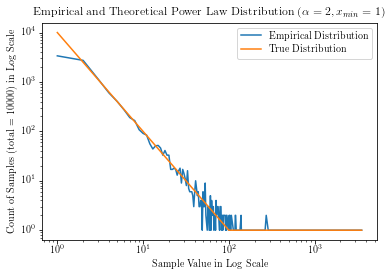

In [203]:
Q2_2()

In [206]:
def Q2_3():
    np.random.seed(42)
    res, fit = sampleAndCompare(fitLS=True)
    X,Y = res[0]
    trueX, trueY = res[1]
    alpha1, pAlpha1Y = fit[0]
    alpha2, pAlpha2Y = fit[1]
    
    print("alpha using all data and LS is %s" % alpha1)
    print("alpha using non-zero data and LS is %s" % alpha2)
    
    plt.close()
    plt.rc('text', usetex=True)
    plt.rc('font', family='serif')
    plt.title("Power Law Distribution " + 
              r'(\alpha = %s, x_{\text{min}} = %s)' % (ALPHA, XMIN))
    plt.xlabel("Sample Value in Log Scale")
    plt.ylabel("Count of Samples (total = %s) in Log Scale" % SAMPLES)
    plt.loglog(X,Y)
    plt.loglog(trueX, trueY)
    plt.loglog(trueX, pAlpha1Y)
    plt.loglog(trueX, pAlpha2Y)
    plt.legend(["Empirical", "True",
                "Least Squares Fit", "Improved Least Squares Fit"])
    if not os.path.exists("output"):
        os.mkdir("output")
    plt.savefig("output/2_3", dpi=500)
    plt.show()

alpha using all data and LS is 1.05802438408
alpha using non-zero data and LS is 1.71909300701


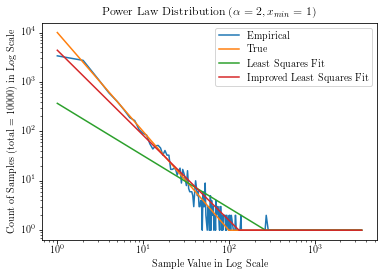

In [207]:
Q2_3()

In [209]:
def Q2_4():
    np.random.seed(42)
    res, fit = sampleAndCompare(fitMLE=True)
    X,Y = res[0]
    trueX, trueY = res[1]
    alpha, pAlphaY = fit[0]
    
    print("alpha using all data and MLE is %s" % alpha)
    
    plt.close()
    plt.rc('text', usetex=True)
    plt.rc('font', family='serif')
    plt.title("Power Law Distribution " + 
              r'(\alpha = %s, x_{\text{min}} = %s)' % (ALPHA, XMIN))
    plt.xlabel("Sample Value in Log Scale")
    plt.ylabel("Count of Samples (total = %s) in Log Scale" % SAMPLES)
    plt.loglog(X,Y)
    plt.loglog(trueX, trueY)
    plt.loglog(trueX, pAlphaY)
    plt.legend(["Empirical", "True", "MLE Fit"])
    if not os.path.exists("output"):
        os.mkdir("output")
    plt.savefig("output/2_4", dpi=500)
    plt.show()

alpha using all data and MLE is 2.07131951671


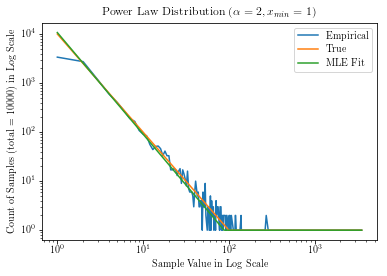

In [210]:
Q2_4()

In [232]:
def Q2_4():
    N_DATASETS = 100
    res = [[],[],[]]
    for _ in xrange(N_DATASETS):
        _, fit = sampleAndCompare(fitLS=True, fitMLE=True)
        assert len(fit) == len(res)
        for i, (alpha, _) in enumerate(fit):
            res[i].append(alpha)
    for name, e in zip(["LS", "Improved LS", "MLLE"], res):
        print("%s estimate has sample mean: %s and sample "
              "standard deviation %s." % (name, np.mean(e), np.std(e)))

In [233]:
Q2_4()

LS estimate has sample mean: 0.93643299926 and sample standard deviation 0.0828853714802.
Improved LS estimate has sample mean: 1.60560857939 and sample standard deviation 0.0711656806245.
MLLE estimate has sample mean: 2.04568947964 and sample standard deviation 0.0115627148751.
